# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [57]:
%matplotlib inline

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy
from scipy.stats import f_oneway
from scipy.stats import linregress
import statsmodels.api as sm
from statsmodels.formula.api import ols
import re

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:
fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:
fifa.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Preferred Foot,Position,Weak Foot,Acceleration,SprintSpeed,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [4]:
def clenmoney (mill):
    
    mill=str(mill)
    
    floatmoney = float((re.findall('\d+\.?', mill))[0])
    
    x=floatmoney
        
    if mill.endswith('M'):
        return x
    elif mill.endswith('K'):
        x = x/1000
        return x
    else:
        return x

In [5]:
fifa['ValueNumeric']= fifa['Value'].apply(clenmoney)

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [6]:
formula = 'ValueNumeric ~ C(fifa["Preferred Foot"]) + C(Position)'
model = ols(formula=formula, data=fifa).fit()

In [7]:
anova_table = sm.stats.anova_lm(model, typ='II')
anova_table

,sum_sq,df,F,PR(>F)
"C(fifa[""Preferred Foot""])",215.168403,1.0,7.171909,7.412072e-03
C(Position),15578.570147,26.0,19.971492,9.970475e-92
Residual,543598.149338,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [8]:
formula = 'ValueNumeric ~ C(Nationality)'
model = ols(formula=formula, data=fifa).fit()

In [9]:
anova_table = sm.stats.anova_lm(model, typ='II')
anova_table

,sum_sq,df,F,PR(>F)
C(Nationality),30301.545794,163.0,6.337411,5.645955e-122
Residual,529266.032241,18043.0,NaN,NaN


In [10]:
foot = pd.get_dummies(fifa['Preferred Foot'].head())

In [11]:
foofifa = pd.concat([foot, fifa]) 

/home/javier/miniconda3/envs/project/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [12]:
foofifa = foofifa[foofifa[['Left', 'Right']]!= None]

In [13]:
foofifa

,Acceleration,Age,Aggression,Club,Interceptions,Left,LongShots,Name,Nationality,Overall,...,Potential,Preferred Foot,Right,SprintSpeed,Stamina,Strength,Value,ValueNumeric,Vision,Weak Foot
0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
Y = foofifa['ValueNumeric']
X = sm.add_constant(foofifa[['Left', 'Right']])

model = sm.OLS(Y, X).fit() # ordinary least squares
predictions = model.predict(X)

model.summary()

MissingDataError: exog contains inf or nans

# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [16]:
fifanonan = fifa.dropna()

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [54]:
Y = fifanonan['ValueNumeric']
X = sm.add_constant(fifanonan[['Stamina', 'SprintSpeed']])

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     427.5
Date:                Fri, 19 Jul 2019   Prob (F-statistic):          4.42e-182
Time:                        04:01:14   Log-Likelihood:                -55815.
No. Observations:               17918   AIC:                         1.116e+05
Df Residuals:                   17915   BIC:                         1.117e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.0038      0.195    -15.381      0.000      -3.387      -2.621
Stamina         0.0578      0.003     17.690      0.000       0.051       0.064
SprintSpeed     0.0259      0.004      7.320      0.000       0.019       0.033
==============================================================================
Omnibus:                    23100.802   Durbin-Watson:                   0.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4910397.936
Skew:                           7.179   Prob(JB):                         0.00
Kurtosis:                      82.819   Cond. No.                         444.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [55]:
Y = fifanonan['ValueNumeric']
X = sm.add_constant(fifanonan['Potential'])

model = sm.OLS(Y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           ValueNumeric   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8516.
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        04:01:21   Log-Likelihood:                -52748.
No. Observations:               17918   AIC:                         1.055e+05
Df Residuals:                   17916   BIC:                         1.055e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.4545      0.400    -86.133      0.000     -35.239     -33.670
Potential      0.5156      0.006     92.280      0.000       0.505       0.527
==============================================================================
Omnibus:                    23145.497   Durbin-Watson:                   0.535
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6445763.969
Skew:                           7.077   Prob(JB):                         0.00
Kurtosis:                      94.833   Cond. No.                         834.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

In [49]:
reg_result = linregress(fifanonan['Potential'], fifanonan['ValueNumeric'])

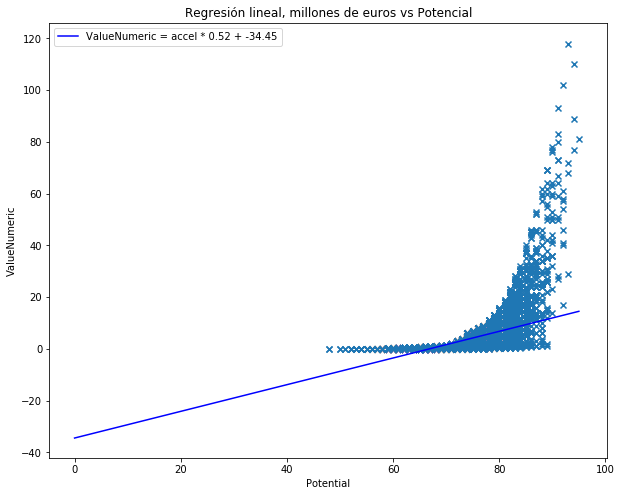

In [50]:
plt.figure(figsize=(10, 8))
plt.plot(x, y, c='b', 
         label=f'ValueNumeric = accel * {reg_result[0]:.2f} + {reg_result[1]:.2f}')
plt.scatter(fifanonan['Potential'], 
            fifanonan['ValueNumeric'], 
            marker='x')


plt.title('Regresión lineal, millones de euros vs Potencial')
plt.xlabel('Potential')
plt.ylabel('ValueNumeric')
plt.legend()
plt.show()